In [36]:
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [37]:
#df    = loader('C:/Users/Emil/Desktop/Parcial/irisdata.txt' )
df = pd.read_table('irisdata.txt', skiprows=9, header = None)
df
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [38]:
X= df.iloc[:,0:4].values
y = df.iloc[:,4].values


X_std = StandardScaler().fit_transform(X)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [39]:
z = np.cov(X_std.T)
z

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [40]:
eig = la.eig(z)
eigval=eig[0]
eigvec=eig[1]
eigval
eig_pairs = [(np.abs(eigval[i]), eigvec[:,i]) for i in range(len(eigval))]

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

matrix_z = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1),
                      eig_pairs[2][1].reshape(4,1)))

Y = X.dot(matrix_w)
Z = X.dot(matrix_z)
eigvec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [41]:
sume = (sum(eigval)).real
sume

4.026845637583894

In [42]:
pc=(eigval/sume).real
por=pc

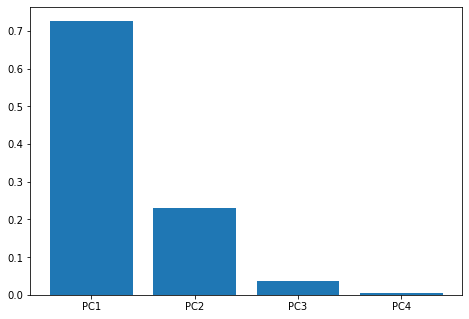

In [43]:
py=np.arange(4)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
lang=['PC1','PC2','PC3','PC4']
ax.bar(lang,por)
plt.show()

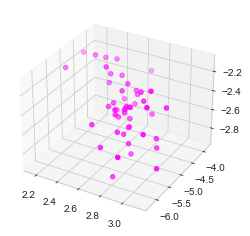

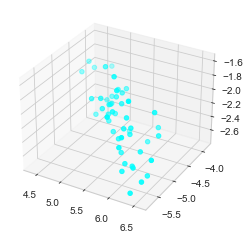

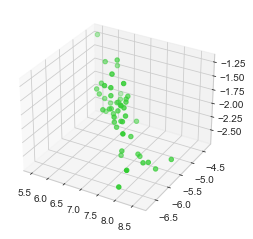

In [44]:
with plt.style.context('seaborn-whitegrid'):   
    
    for lab2, col2 in zip((0, 1, 2),
                        ('magenta', 'cyan', 'limegreen')):
            ax  =  plt.axes(projection='3d')
            ax.scatter3D(Z[y==lab2, 0],Z[y==lab2, 1],Z[y==lab2, 2], label=lab2,c=col2 )
            plt.show()

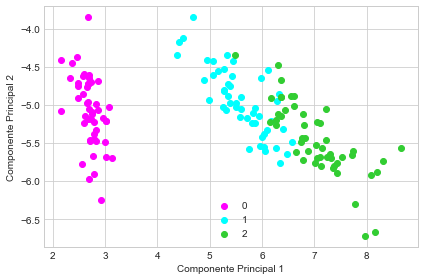

In [45]:
with plt.style.context('seaborn-whitegrid'):

    for lab, col in zip((0, 1, 2),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(Y[y==lab, 0],Y[y==lab, 1],label=lab,c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()